# Mushroom Project

In [34]:
# Import and take a look at the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load data
ds=pd.read_csv('Mushrooms.csv')
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [37]:
ds.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [38]:
ds.shape

(8124, 23)

In [39]:
ds.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [40]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Summary statistics

In [41]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data visualzations

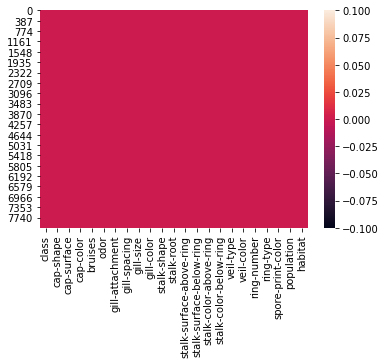

In [42]:
sns.heatmap(ds.isnull())

Observation: No missing values.

Checking correlation

In [43]:
Mdscor=ds.corr()
Mdscor

""


Observation: Categorical data cannot be correlated with this process.

Encode categorical data to numerical data with LabelEncoder

In [44]:
eds=ds

In [45]:
from sklearn.preprocessing import LabelEncoder
Encoderds = LabelEncoder() 
for col in eds:
    eds[col] = Encoderds.fit_transform(eds[col])


In [46]:
eds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Check and remove outliers and skewness

In [47]:
from scipy.stats import zscore
z_score=abs(zscore(eds))
print(eds.shape)
nds=eds.loc[(z_score<3).all(axis=1)]
print(nds.shape)

(8124, 23)
(0, 23)


Removing outliers with zscore removes all rows so eds is used going forward.

In [48]:
eds.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [49]:
#Treating using log
for col in eds.columns:
    if eds.skew().loc[col]>0.55:
        eds[col]=np.log1p(eds[col])

In [50]:
eds.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                  -0.365280
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.129453
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 1.481287
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.342186
dtype: float64

Need to check skewness after StandardScaler is applied and adjusted if needed.

# Separate data into x and y

In [51]:
# Lineup target and input values
eds_x=eds.drop(columns='class') 
y=eds[['class']]
eds_x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,...,2,7,7,0,2,0.693147,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,7,7,0,2,0.693147,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,7,7,0,2,0.693147,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,7,7,0,2,0.693147,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,7,7,0,2,0.693147,0,3,0,0.693147


Split data into train and test sets

In [52]:
#Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols=eds_x.columns
eds_x=sc.fit_transform(eds_x)
eds_x=pd.DataFrame(eds_x,columns=cols)

In [53]:
# Apply PCA to reduce the amount of input columns
from sklearn.decomposition import PCA
pca=PCA(n_components=10) 
eds_x.shape

(8124, 22)

In [54]:
eds_array=pca.fit_transform(eds_x)
x=pd.DataFrame(eds_array)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.654717,-0.944595,-0.949179,0.506091,-1.373413,-1.468057,-0.462108,1.435986,-0.931764,1.250934
1,-2.188395,0.127921,-1.021676,0.725332,-1.627804,-1.415557,-0.928572,0.595881,0.237860,-0.217450
2,-1.776482,-0.300992,-1.050678,1.552649,-1.869058,-0.784502,1.488397,-1.061712,-0.245121,0.749250
3,-0.858012,-0.836447,-0.985399,0.714964,-1.919175,-1.969356,-0.510371,1.223946,-0.080340,0.823328
4,0.608557,1.021617,-2.840959,1.332164,1.504249,-0.720608,0.192214,1.590771,1.417804,1.014121


In [55]:
x.skew()

0    0.775671
1    0.686705
2    0.770703
3    2.447417
4    0.117527
5    1.194143
6   -0.298648
7    0.214692
8   -0.119907
9    0.128271
dtype: float64

Extra skewness treatment needed.

Observation: Scaling has no effect.

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score


In [57]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Using GridSearchCV to select the best parameter

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [59]:
# Best parameters for SVC
from sklearn.model_selection import GridSearchCV

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'rbf'}

In [60]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'criterion': 'gini'}

In [61]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

# Logistic Regression and binary classification methods

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [63]:
KNN=KNeighborsClassifier(n_neighbors= 1)
SV=SVC(kernel='rbf')# check c parameter?
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
MNB=MultinomialNB()

In [64]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB',MNB))

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,auc

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')



Accuracy score = 1.0


cross validation score = 0.975885699743697


roc_auc_score =  1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



[[1257    0]
 [   0 1181]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* SVC *************************

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter

ValueError: Negative values in data passed to MultinomialNB (input X)

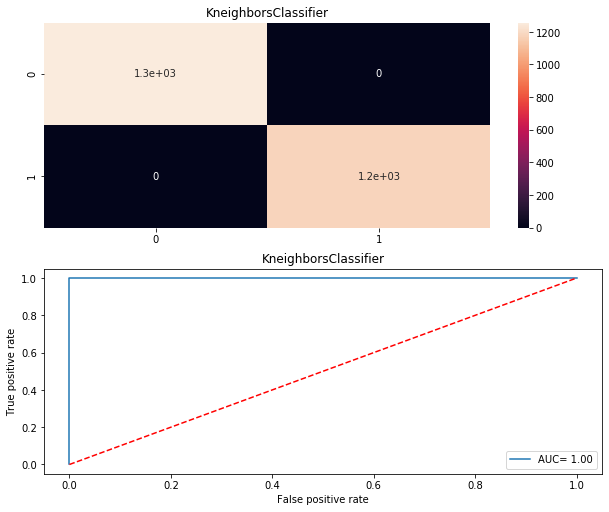

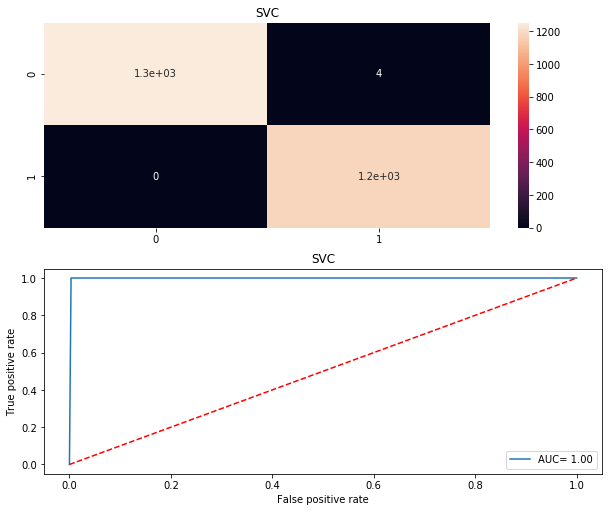

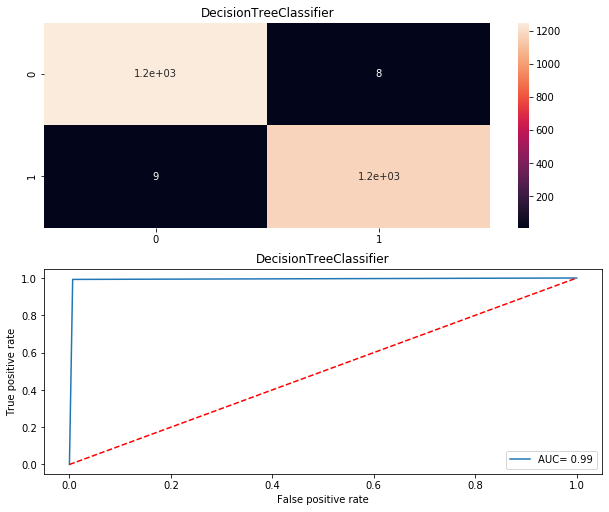

In [66]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [67]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

ValueError: arrays must all be same length

I choose the KneighborsClassifier model as my final model because it gives the best scores.

Accuracy_score = 100.0

Cross_val_score = 97.6

Roc_auc_score = 100.0

In [68]:
from sklearn.externals import joblib
joblib.dump(KNN,'Mushroom_predictive_model.csv')

['Mushroom_predictive_model.csv']

In [69]:
fmodel=joblib.load('Mushroom_predictive_model.csv')

In [70]:
fmodel.predict(x_test)

array([0, 1, 1, ..., 1, 0, 0])